In [107]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np 
import GPy
import torch
from __future__ import absolute_import, division, print_function
import torch
from torch.distributions import constraints
from torch.nn import Parameter
import pyro
from pyro.contrib.gp.util import Parameterized
import pyro.distributions as dist
import pyro.infer as infer
import pyro.optim as optim
from pyro.params import param_with_module_name
import pyro.contrib.gp as gp
import pyro.distributions as dist
import matplotlib.pyplot as plt
pyro.clear_param_store()
import tensorflow as tf
import numpy as np 
import pandas as pd
import numpy
import math
import cProfile
import time
import GPy
import numpy as np
from matplotlib import pyplot as plt

import statsmodels.api as sm
import sympy as sp
#import pymc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.special import gamma
from GPy.core.parameterization.variational import NormalPosterior, NormalPrior

from sympy.interactive import printing
import pyro.contrib.gp.models.vsgp as vsgp
from GPy.util.linalg import pdinv
from pyro.infer.mcmc.hmc import HMC
from pyro.infer.mcmc import MCMC
from matplotlib import pyplot
pyro.clear_param_store()
import time
torch.manual_seed(12)
pyro.set_rng_seed(101)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np 
import gpflow

In [108]:
def initialize_latent(input_dim, Y):
    Xr = np.asfortranarray(np.random.normal(0, 1, (Y.shape[0], input_dim)))
    p = GPy.util.pca.PCA(Y)
    PC = p.project(Y, min(input_dim, Y.shape[1]))
    Xr[:PC.shape[0], :PC.shape[1]] = PC
    var = .1*p.fracs[:input_dim]
    Xr -= Xr.mean(0)
    Xr /= Xr.std(0)
    return Xr, var/var.max()

In [157]:
X = np.load('datasets/X.npy')
Y = np.load('datasets/Y.npy')
N = X.shape[0]
sample_mean = np.mean(X[:N,:])
sample_std = np.std(X[:N,:])
sample_norm = (X[:N,:] - sample_mean)/sample_std # normalisation
X_flat = np.array(sample_norm).reshape((2062, 64*64))
#X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.3, random_state=42)

In [110]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100, 100, 100, 100), random_state=1)

In [112]:
M = 40  # number of inducing pts
Q=15
X_mean = gpflow.models.PCA_reduce(X_flat, Q) # Initialise via PCA
Z = np.random.permutation(X_mean.copy())[:M]
Xu = torch.tensor(Z).float()
Xr, fracs = initialize_latent(Q, X_flat)
X_loc = torch.tensor(Xr).float()
fracs = torch.tensor(1./fracs).float()
kernel = gp.kernels.RBF(input_dim=Q, lengthscale=fracs)
gpmodel = gp.models.SparseGPRegression(X_loc, torch.tensor(X_flat.T).float(), kernel, Xu, noise=torch.tensor(0.2953218115879997),approx='VFE')
gplvm = gp.models.GPLVM(gpmodel)

CPU+SystemTime:41353.203125 seconds
Code Run Time:14382.599531173706 seconds


Text(0.5,1,'Convergence of SVI')

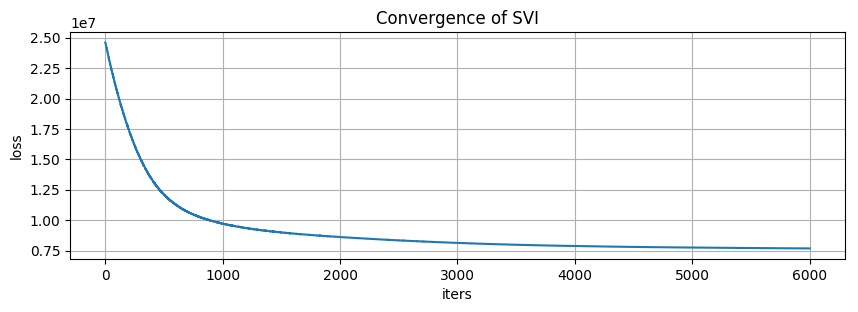

In [113]:
i=list(range(1,6001))
st = time.process_time()
st2 = time.time()
losses = gplvm.optimize(num_steps=6000)  # doctest: +SKIP
end =  time.process_time()
end2 = time.time()
print(str('CPU+SystemTime:')+str(end-st)+' '+str('seconds'))
print(str('Code Run Time:')+str(end2-st2)+' '+str('seconds'))
pyplot.figure(figsize=(10,3), dpi=100).set_facecolor('white')
pyplot.plot(i,losses)
pyplot.xlabel('iters')
pyplot.ylabel('loss')
pyplot.grid()
pyplot.title('Convergence of SVI')

In [114]:
X_train, X_test, y_train, y_test = train_test_split(gplvm.get_param('X_loc').detach().numpy(), Y, test_size=0.3, random_state=42)

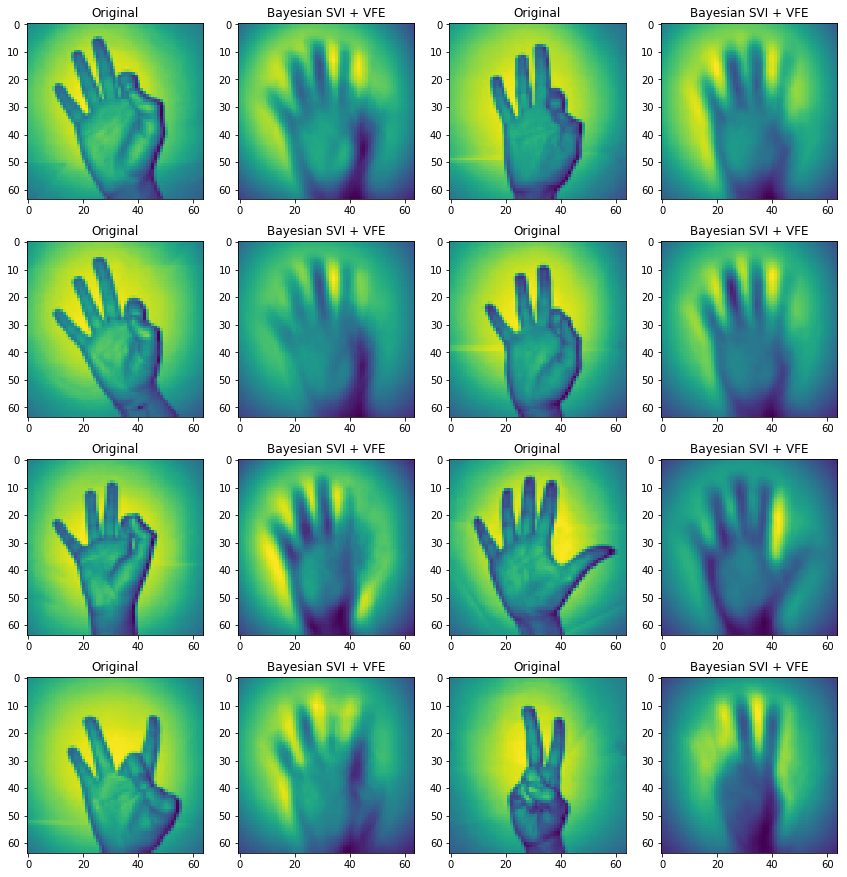

In [115]:
X_back,X_var = gplvm.base_model.forward(Xnew=gplvm.get_param('X_loc'))
X_back = X_back.detach().numpy().T
f = plt.figure()
f.add_subplot(4,4, 1)
plt.title("Original")
plt.imshow(X_flat[10].reshape((64,64)))
f.add_subplot(4,4, 2)
plt.title("Bayesian SVI + VFE")
plt.imshow(X_back[10].reshape((64,64)))
f.add_subplot(4,4, 3)
plt.title("Original")
plt.imshow(X_flat[1].reshape((64,64)))
f.add_subplot(4,4, 4)
plt.title("Bayesian SVI + VFE")
plt.imshow(X_back[1].reshape((64,64)))
f.add_subplot(4,4, 5)
plt.title("Original")
plt.imshow(X_flat[2].reshape((64,64)))
f.add_subplot(4,4, 6)
plt.title("Bayesian SVI + VFE")
plt.imshow(X_back[2].reshape((64,64)))
plt.subplots_adjust(bottom=0.1, right=2, top=3)
f.add_subplot(4,4, 7)
plt.title("Original")
plt.imshow(X_flat[3].reshape((64,64)))
f.add_subplot(4,4, 8)
plt.title("Bayesian SVI + VFE")
plt.imshow(X_back[3].reshape((64,64)))
plt.subplots_adjust(bottom=0.1, right=2, top=3)
f.add_subplot(4,4, 9)
plt.title("Original")
plt.imshow(X_flat[42].reshape((64,64)))
f.add_subplot(4,4, 10)
plt.title("Bayesian SVI + VFE")
plt.imshow(X_back[42].reshape((64,64)))
f.add_subplot(4,4, 11)
plt.title("Original")
plt.imshow(X_flat[2005].reshape((64,64)))
f.add_subplot(4,4, 12)
plt.title("Bayesian SVI + VFE")
plt.imshow(X_back[2005].reshape((64,64)))

f.add_subplot(4,4, 13)
plt.title("Original")
plt.imshow(X_flat[1115].reshape((64,64)))
f.add_subplot(4,4, 14)
plt.title("Bayesian SVI + VFE")
plt.imshow(X_back[1115].reshape((64,64)))

f.add_subplot(4,4, 15)
plt.title("Original")
plt.imshow(X_flat[1825].reshape((64,64)))
f.add_subplot(4,4, 16)
plt.title("Bayesian SVI + VFE")
plt.imshow(X_back[1825].reshape((64,64)))
plt.subplots_adjust(bottom=0.1, right=2, top=3)

In [116]:
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [117]:
y_hat_reduced = clf.predict(X_test)

In [118]:
print("accuracy: " + str(accuracy_score(y_test, y_hat_reduced)))

accuracy: 0.6526655896607432


In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [120]:
names = ["Nearest Neighbors", "Gaussian Process",
         "Decision Tree", "Random Forest", "AdaBoost",
         "Naive Bayes", "QDA","Linear SVC"]

In [121]:

classifiers = [
    KNeighborsClassifier(3),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1,random_state=42),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SVC(kernel="linear", C=0.025)]

In [122]:
classifiers[0].fit(X_train, y_train)
score = classifiers[0].score(X_test, y_test)
print(names[0]+':'+str(score))

Nearest Neighbors:0.568659127625202


In [123]:
parameters = [
              {'C': [1, 10, 100], 'kernel': ['linear']},
              {'C': [1, 10, 100], 'gamma': [0.1,0.001, 0.0001], 'kernel': ['rbf','sigmoid','poly']},
             ]

In [124]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [125]:
model = svm.SVC()
clf3 = GridSearchCV(model, parameters)

In [126]:
unique_rows = np.unique(y_train, axis=0)
i=0
d={}
for i in range(len(unique_rows)):
    d[str(unique_rows[i])]=i

In [127]:
temp_train=[]
for i in y_train:
    temp_train.append(d[str(i)])

In [128]:
clf3.fit(X_train, np.array(temp_train))

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']}, {'C': [1, 10, 100], 'gamma': [0.1, 0.001, 0.0001], 'kernel': ['rbf', 'sigmoid', 'poly']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
#print('Best Estimator')
#print(clf3.best_estimator_)
#print('Best Parameter')
#print(clf3.best_params_)

In [90]:
temp_test=[]
unique_rows = np.unique(y_test, axis=0)
i=0
d={}
for i in range(len(unique_rows)):
    d[str(unique_rows[i])]=i
for i in y_test:
    temp_test.append(d[str(i)])

In [129]:
y_hat_reduced = clf3.predict(X_test)

In [130]:
print("accuracy: " + str(accuracy_score(np.array(temp_test), y_hat_reduced)))

accuracy: 0.72859450726979


In [131]:
import pickle
model={}
model[0]=gplvm
pickle.dump(model, open( "savefit-vfe40.p", "wb" ) )

In [132]:
classifiers[1].fit(X_train, np.array(temp_train))
score = classifiers[1].score(X_test, np.array(temp_test))
print(names[1]+':'+str(score))

 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/gaussian_process/gpc.py:430: UserWarning:fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 2.32578307e-05, -1.58494646e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 72, 'nit': 12, 'warnflag': 2}
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/gaussian_process/gpc.py:430: UserWarning:fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.0003042 ,  0.00125171]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 96, 'nit': 21, 'warnflag': 2}


Gaussian Process:0.7399030694668821


In [133]:
classifiers[2].fit(X_train, np.array(temp_train))
score = classifiers[2].score(X_test, np.array(temp_test))
print(names[2]+':'+str(score))

Decision Tree:0.34248788368336025


In [134]:
classifiers[3].fit(X_train, np.array(temp_train))
score = classifiers[3].score(X_test, np.array(temp_test))
print(names[3]+':'+str(score))

Random Forest:0.41033925686591277


In [135]:
classifiers[4].fit(X_train, np.array(temp_train))
score = classifiers[4].score(X_test, np.array(temp_test))
print(names[4]+':'+str(score))

AdaBoost:0.4975767366720517


In [139]:
classifiers[5].fit(X_train, np.array(temp_train))
score = classifiers[5].score(X_test, np.array(temp_test))
print(names[5]+':'+str(score))

Naive Bayes:0.5767366720516963


In [140]:
classifiers[6].fit(X_train, np.array(temp_train))
score = classifiers[6].score(X_test, np.array(temp_test))
print(names[6]+':'+str(score))

QDA:0.7350565428109854


In [141]:
classifiers[7].fit(X_train, np.array(temp_train))
score = classifiers[7].score(X_test, np.array(temp_test))
print(names[7]+':'+str(score))

Linear SVC:0.6639741518578353


 /home/aneeqr/.local/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning:The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0


Text(0.5,1,'VFE ARD Contribution')

 /home/aneeqr/.local/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


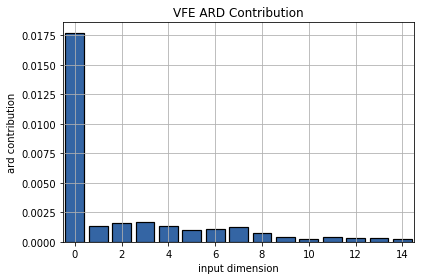

In [142]:
active = gplvm.base_model.kernel.active_dims
input_dim = gplvm.base_model.kernel.input_dim
Var = gplvm.base_model.kernel.get_param('variance').detach().numpy()
Len = gplvm.base_model.kernel.get_param('lengthscale').detach().numpy()
Co = GPy.kern.RBF(ARD=True,active_dims=active,input_dim=input_dim,lengthscale=Len,variance=Var)
Co.plot_ARD()
plt.grid()
plt.title('VFE ARD Contribution')

In [163]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_flat, Y, test_size=0.3, random_state=42)

In [164]:
m = GPy.models.BayesianGPLVM(X_train2, 15,  init="PCA",num_inducing=20)
m.data_labels = X_train.argmax(axis=1)
loss = m.optimize('bfgs', messages=1,max_iters=5000)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    06s66  0008   5.780821e+06   4.956036e+09 
    22s43  0026   5.511574e+06   3.336892e+08 
 01m06s58  0076   5.374659e+06   3.347641e+07 
 03m07s52  0216   5.334027e+06   2.543122e+07 
 08m46s47  0606   5.272527e+06   3.643271e+06 
 22m07s09  1526   5.228158e+06   2.519502e+06 
Runtime:  22m07s09
Optimization status: Converged



In [165]:
clf.fit(m.X.mean,y_train2)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [166]:
_,X_test_reduced = m.infer_newX(Y_new=X_test2)

In [167]:
y_hat_reduced = clf.predict(X_test_reduced.X.mean)

In [185]:
print("accuracy: " + str(accuracy_score(y_test2, y_hat_reduced)))

accuracy: 0.7819063004846527


 /home/aneeqr/.local/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning:The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
 /home/aneeqr/.local/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


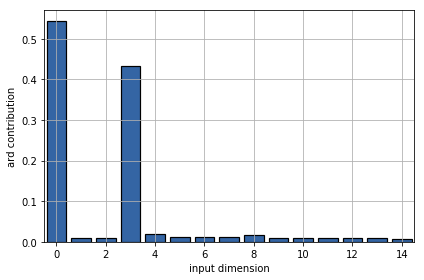

In [175]:
m.kern.plot_ARD()
plt.grid()

In [171]:
X_test_back = m.predict(X_test_reduced.X.mean)

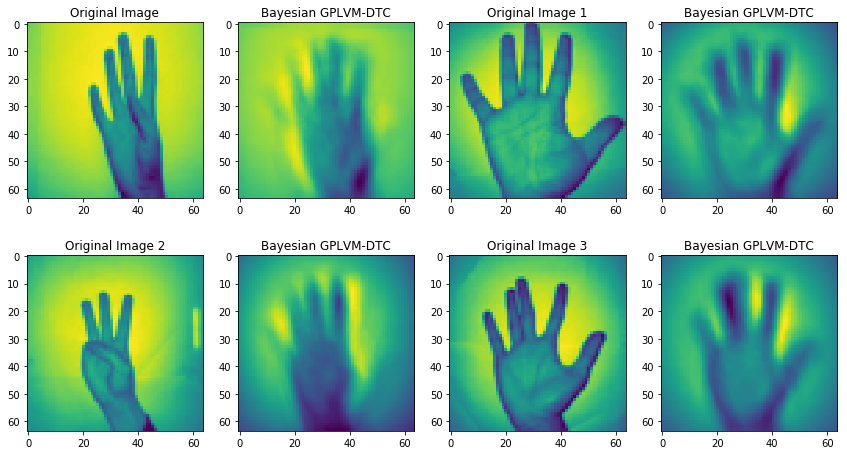

In [176]:
f = plt.figure()
f.add_subplot(5,4, 1)
plt.title("Original Image")
plt.imshow(X_test2[0].reshape((64,64)))
f.add_subplot(5,4, 2)
plt.title("Bayesian GPLVM-DTC")
plt.imshow(X_test_back[0][0].reshape((64,64)))
f.add_subplot(5,4, 3)
plt.title("Original Image 1")
plt.imshow(X_test2[1].reshape((64,64)))
f.add_subplot(5,4, 4)
plt.title("Bayesian GPLVM-DTC")
plt.imshow(X_test_back[0][1].reshape((64,64)))
f.add_subplot(5,4, 5)
plt.title("Original Image 2")
plt.imshow(X_test2[2].reshape((64,64)))
plt.subplots_adjust(bottom=0.1, right=2, top=4)
f.add_subplot(5,4, 6)
plt.title("Bayesian GPLVM-DTC")
plt.imshow(X_test_back[0][2].reshape((64,64)))
f.add_subplot(5,4, 7)
plt.title("Original Image 3")
plt.imshow(X_test2[3].reshape((64,64)))
f.add_subplot(5,4, 8)
plt.title("Bayesian GPLVM-DTC")
plt.imshow(X_test_back[0][3].reshape((64,64)))
plt.show(block=True)

In [193]:
temp_test=[]
unique_rows = np.unique(y_test2, axis=0)
i=0
d={}
for i in range(len(unique_rows)):
    d[str(unique_rows[i])]=i
for i in y_test2:
    temp_test.append(d[str(i)])

In [207]:
unique_rows = np.unique(y_train2, axis=0)
i=0
d={}
for i in range(len(unique_rows)):
    d[str(unique_rows[i])]=i
temp_train=[]
for i in y_train2:
    temp_train.append(d[str(i)])

In [210]:
classifiers[0].fit(X_train2, y_train2)
score = classifiers[0].score(X_test2, y_test2)
print(names[0]+':'+str(score))

Nearest Neighbors:0.6106623586429726


In [189]:
clf3.fit(X_train2,np.array(temp_train))
y_hat_reduced = clf3.predict(X_test2)
print("accuracy: " + str(accuracy_score(np.array(temp_test), y_hat_reduced)))

accuracy: 0.8659127625201939


In [209]:
classifiers[1].fit(X_train2, np.array(temp_train))
score = classifiers[1].score(X_test2, np.array(temp_test))
print(names[1]+':'+str(score))

Gaussian Process:0.0888529886914378


In [194]:
classifiers[2].fit(X_train2, np.array(temp_train))
score = classifiers[2].score(X_test2, np.array(temp_test))
print(names[2]+':'+str(score))

Decision Tree:0.481421647819063


In [199]:
classifiers[3].fit(X_train2, np.array(temp_train))
score = classifiers[3].score(X_test2, np.array(temp_test))
print(names[3]+':'+str(score))

Random Forest:0.37479806138933763


In [196]:
classifiers[4].fit(X_train2, np.array(temp_train))
score = classifiers[4].score(X_test2, np.array(temp_test))
print(names[4]+':'+str(score))

AdaBoost:0.308562197092084


In [197]:
classifiers[5].fit(X_train2, np.array(temp_train))
score = classifiers[5].score(X_test2, np.array(temp_test))
print(names[5]+':'+str(score))

Naive Bayes:0.5896607431340872


In [208]:
classifiers[6].fit(X_train2, np.array(temp_train))
score = classifiers[6].score(X_test2, np.array(temp_test))
print(names[6]+':'+str(score))

 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.l

QDA:0.19547657512116318


 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear


In [201]:
classifiers[7].fit(X_train2, np.array(temp_train))
score = classifiers[7].score(X_test2, np.array(temp_test))
print(names[7]+':'+str(score))

Linear SVC:0.7915993537964459


 ## Not infer Model on full data BGPLVM

In [163]:
m2 = GPy.models.BayesianGPLVM(X_flat, 15,  init="PCA",num_inducing=40)
m2.data_labels = X_flat.argmax(axis=1)
loss = m2.optimize('bfgs', messages=1,max_iters=3000)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    13s91  0008   8.022150e+06   2.993729e+09 
    44s66  0025   7.628208e+06   1.702019e+08 
 02m09s11  0072   7.340633e+06   1.072195e+08 
 05m59s04  0202   7.276409e+06   1.378549e+09 
 16m45s44  0564   7.197135e+06   2.413792e+07 
 25m29s45  0860   7.176980e+06   1.178386e+07 
Runtime:  25m29s45
Optimization status: Converged



In [164]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(m2.X.mean, Y, test_size=0.3, random_state=42)

 /home/aneeqr/.local/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning:The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
 /home/aneeqr/.local/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


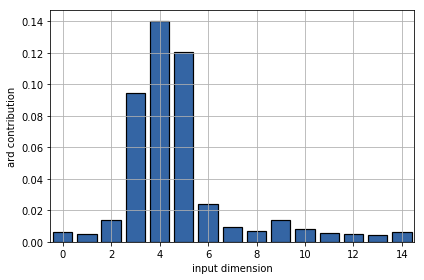

In [165]:
m2.kern.plot_ARD()
plt.grid()

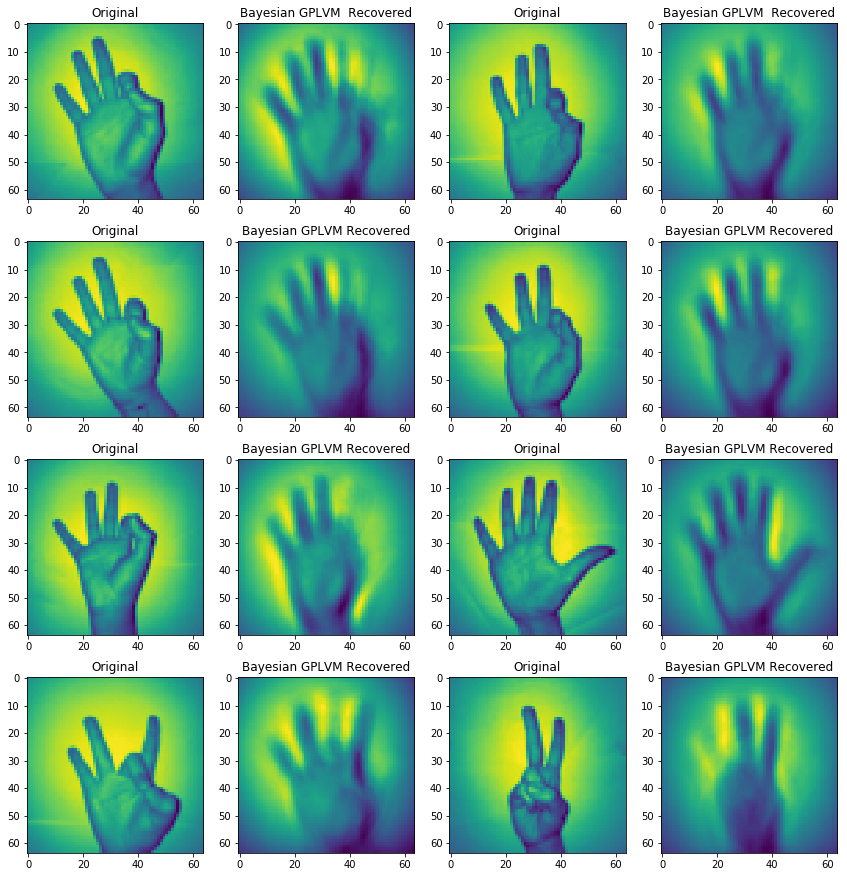

In [182]:
X_test_back,X_var = m2.predict(m2.X.mean)
f = plt.figure()
f.add_subplot(4,4, 1)
plt.title("Original")
plt.imshow(X_flat[10].reshape((64,64)))
f.add_subplot(4,4, 2)
plt.title("Bayesian GPLVM  Recovered")
plt.imshow(X_test_back[10].reshape((64,64)))
f.add_subplot(4,4, 3)
plt.title("Original")
plt.imshow(X_flat[1].reshape((64,64)))
f.add_subplot(4,4, 4)
plt.title("Bayesian GPLVM  Recovered")
plt.imshow(X_test_back[1].reshape((64,64)))
f.add_subplot(4,4, 5)
plt.title("Original")
plt.imshow(X_flat[2].reshape((64,64)))
f.add_subplot(4,4, 6)
plt.title("Bayesian GPLVM Recovered")
plt.imshow(X_test_back[2].reshape((64,64)))
plt.subplots_adjust(bottom=0.1, right=2, top=3)
f.add_subplot(4,4, 7)
plt.title("Original")
plt.imshow(X_flat[3].reshape((64,64)))
f.add_subplot(4,4, 8)
plt.title("Bayesian GPLVM Recovered")
plt.imshow(X_test_back[3].reshape((64,64)))
plt.subplots_adjust(bottom=0.1, right=2, top=3)
f.add_subplot(4,4, 9)
plt.title("Original")
plt.imshow(X_flat[42].reshape((64,64)))
f.add_subplot(4,4, 10)
plt.title("Bayesian GPLVM Recovered")
plt.imshow(X_test_back[42].reshape((64,64)))
f.add_subplot(4,4, 11)
plt.title("Original")
plt.imshow(X_flat[2005].reshape((64,64)))
f.add_subplot(4,4, 12)
plt.title("Bayesian GPLVM Recovered")
plt.imshow(X_test_back[2005].reshape((64,64)))

f.add_subplot(4,4, 13)
plt.title("Original")
plt.imshow(X_flat[1115].reshape((64,64)))
f.add_subplot(4,4, 14)
plt.title("Bayesian GPLVM Recovered")
plt.imshow(X_test_back[1115].reshape((64,64)))

f.add_subplot(4,4, 15)
plt.title("Original")
plt.imshow(X_flat[1825].reshape((64,64)))
f.add_subplot(4,4, 16)
plt.title("Bayesian GPLVM Recovered")
plt.imshow(X_test_back[1825].reshape((64,64)))
plt.subplots_adjust(bottom=0.1, right=2, top=3)

In [167]:
temp_test=[]
unique_rows = np.unique(y_test3, axis=0)
i=0
d={}
for i in range(len(unique_rows)):
    d[str(unique_rows[i])]=i
for i in y_test3:
    temp_test.append(d[str(i)])

In [168]:
unique_rows = np.unique(y_train3, axis=0)
i=0
d={}
for i in range(len(unique_rows)):
    d[str(unique_rows[i])]=i
temp_train=[]
for i in y_train3:
    temp_train.append(d[str(i)])

In [169]:
classifiers[0].fit(X_train3, y_train3)
score = classifiers[0].score(X_test3, y_test3)
print(names[0]+':'+str(score))

Nearest Neighbors:0.5961227786752827


In [181]:
classifiers[1].fit(X_train3, np.array(temp_train))
score = classifiers[1].score(X_test3, np.array(temp_test))
print(names[1]+':'+str(score))

Gaussian Process:0.7657512116316639


In [170]:
classifiers[2].fit(X_train3, np.array(temp_train))
score = classifiers[2].score(X_test3, np.array(temp_test))
print(names[2]+':'+str(score))

Decision Tree:0.38449111470113084


In [171]:
classifiers[3].fit(X_train3, np.array(temp_train))
score = classifiers[3].score(X_test3, np.array(temp_test))
print(names[3]+':'+str(score))

Random Forest:0.4798061389337641


In [172]:
classifiers[4].fit(X_train3, np.array(temp_train))
score = classifiers[4].score(X_test3, np.array(temp_test))
print(names[4]+':'+str(score))

AdaBoost:0.2084006462035541


In [173]:
classifiers[5].fit(X_train3, np.array(temp_train))
score = classifiers[5].score(X_test3, np.array(temp_test))
print(names[5]+':'+str(score))

Naive Bayes:0.6042003231017771


In [174]:
classifiers[6].fit(X_train3, np.array(temp_train))
score = classifiers[6].score(X_test3, np.array(temp_test))
print(names[6]+':'+str(score))

QDA:0.7544426494345718


In [175]:
classifiers[7].fit(X_train3, np.array(temp_train))
score = classifiers[7].score(X_test3, np.array(temp_test))
print(names[7]+':'+str(score))

Linear SVC:0.6995153473344103


In [176]:
clf3.fit(X_train3,np.array(temp_train))
y_hat_reduced = clf3.predict(X_test3)
print("accuracy: " + str(accuracy_score(np.array(temp_test), y_hat_reduced)))

accuracy: 0.7479806138933764


In [180]:
clf.fit(X_train3,y_train3)
y_hat_reduced = clf.predict(X_test3)
print("accuracy: " + str(accuracy_score(y_test3, y_hat_reduced)))

accuracy: 0.6946688206785138


In [179]:
import pickle
model2={}
model2[0]=m2
pickle.dump(model2, open( "savefit-vfe40m2final.p", "wb" ) )

# PSIS

In [8]:
import pickle

In [9]:
temp = pickle.load( open( "savefitc.p", "rb" ))

In [11]:
gplvm = temp[0]

In [144]:
X = gplvm.get_param("X_loc")
X_var = gplvm.get_param("X_scale_tril")
Kfu = gplvm.base_model.kernel(X, gplvm.base_model.get_param('Xu')).detach().numpy()
Kuu = gplvm.base_model.kernel(gplvm.base_model.get_param('Xu'), gplvm.base_model.get_param('Xu')).detach().numpy()
Kuf = Kfu.T
print('Kfu shape'+str(Kfu.shape))
print('Kuu shape'+str(Kuu.shape))
print('Kuf shape'+str(Kuf.shape))
noise = gplvm.base_model.get_param('noise').detach().numpy()
K = np.dot(np.dot(Kfu,pdinv(Kuu)[0]),Kuf)  + np.eye(X.shape[0])*(1/noise)

Kfu shape(2062, 40)
Kuu shape(40, 40)
Kuf shape(40, 2062)


In [145]:
Kfu2 =  m2.kern.K(m2.X.mean, m2.Z)
Kuu2 = m2.kern.K(m2.Z, m2.Z)
Kuf2 = Kfu2.T 
print('Kfu shape'+str(Kfu2.shape))
print('Kuu shape'+str(Kuu2.shape))
print('Kuf shape'+str(Kuf2.shape))
Kff = np.dot(np.dot(Kfu2,pdinv(Kuu2)[0]),Kuf2)
Kff = Kff + np.eye(m2.X.mean.shape[0])*(1/m2.Gaussian_noise.variance)

Kfu shape(2062, 40)
Kuu shape(40, 40)
Kuf shape(40, 2062)


In [36]:
Samples=100
VS = [] # Vector Containing Matrix Samples (Xs)
for i in range(Samples):
    VS.append(pyro.sample('Variational Distibtuion',dist.MultivariateNormal(gplvm.get_param("X_loc"), scale_tril=gplvm.get_param("X_scale_tril")).independent(gplvm.get_param("X_loc").dim()-1),))

In [37]:
def Joint_Prob(Y,Xs,N,D,Q,m,K_new):
    K_inv = np.linalg.inv(K_new)
    #K_inv = pdinv(K_inv)[0]
    Prob = -N*D*0.5*np.log(2*np.pi) - D/2*np.log(K_new)-1/2*np.trace(np.matmul(np.matmul(Y.T,K_inv),Y)) - (N*Q/2)*np.log(2*np.pi)-0.5*np.trace(np.matmul(Xs,Xs.T))
    return Prob 

In [38]:
def Var(X,gplvm,D,K_new):
    #Kfu = gplvm.base_model.kernel(X, gplvm.base_model.get_param('Xu')).detach().numpy()
    #Kuu = gplvm.base_model.kernel(gplvm.base_model.get_param('Xu'), gplvm.base_model.get_param('Xu')).detach().numpy()
    #Kuf = Kfu.T
    #noise = gplvm.base_model.get_param('noise').detach().numpy()
    #K_new = np.dot(np.dot(Kfu,pdinv(Kuu)[0]),Kuf)  + np.eye(X.shape[0])*(1/noise)
    
    K_inv = pdinv(K_new)[0]
    temp = np.matmul(np.matmul(X.detach().numpy().T,K_inv),X.detach().numpy()) 
    qx = -0.5*(K.shape[0]*(D))*(np.log(np.pi*2)) - D/2*np.log(K_new) - 0.5*np.trace(temp)
    return qx

In [40]:
N= 2062
D=4096
Q=15
Join = []
for sample in VS:
    Join.append(Joint_Prob(X_flat,sample.detach().numpy(),N,D,Q,m2,Kff))

In [41]:
qx = []
for sample in VS:
    qx.append(Var(sample,gplvm=gplvm,D=Q,K_new=K))

In [42]:
Rs,Rs2 = log_Ratios(qx,Join)

In [48]:

#for i in Rs2:
    #print('K:'+ str(psisloo(-1*np.array(i)))) 





# Markov Chain Monte Carlo

In [258]:
from __future__ import print_function
import gpflow
from gpflow import kernels
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import pods
pods.datasets.overide_manual_authorize = True  # dont ask to authorize
gpflow.settings.numerics.quadrature = 'error'  # throw error if quadrature is used for kernel expectations

In [266]:
M = 20  # number of inducing pts
N = X_flat.shape[0]
X_mean = gpflow.models.PCA_reduce(X_flat, Q) # Initialise via PCA
Z = np.random.permutation(X_mean.copy())[:M]
k = (kernels.RBF(Q, ARD=True))
m4 = gpflow.models.BayesianGPLVM(X_mean=X_mean, X_var=0.1*np.ones((N, Q)), Y= tf.cast(X_flat, tf.float64),
                                kern=k, M=M, Z=Z)

In [268]:
m4.likelihood.variance= 0.2953218115879997

In [269]:
m4.compile()
o = gpflow.train.AdamOptimizer(0.01)
o.minimize(m4, maxiter=100) # start near MAP

In [270]:
s = gpflow.train.HMC()
samples = s.sample(m4, 100, epsilon=0.12, lmax=20, lmin=5, thin=5, logprobs=True)

In [271]:
X_loc = np.average(samples['BayesianGPLVM/X_mean'], axis=0)
X_var = np.average(samples['BayesianGPLVM/X_var'], axis=0)
log_prob = samples.logprobs

In [279]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_loc, Y, test_size=0.3, random_state=42)

In [345]:
clf.fit(X_train4,y_train4)
y_hat_reduced = clf.predict(X_test4)
print("accuracy: " + str(accuracy_score(y_test4, y_hat_reduced)))

accuracy: 0.6219709208400647


In [281]:
temp_test=[]
unique_rows = np.unique(y_test3, axis=0)
i=0
d={}
for i in range(len(unique_rows)):
    d[str(unique_rows[i])]=i
for i in y_test4:
    temp_test.append(d[str(i)])

In [282]:
unique_rows = np.unique(y_train4, axis=0)
i=0
d={}
for i in range(len(unique_rows)):
    d[str(unique_rows[i])]=i
temp_train=[]
for i in y_train4:
    temp_train.append(d[str(i)])

In [283]:
classifiers[0].fit(X_train4, y_train4)
score = classifiers[0].score(X_test4, y_test4)
print(names[0]+':'+str(score))

Nearest Neighbors:0.5476575121163166


In [284]:
classifiers[1].fit(X_train4, np.array(temp_train))
score = classifiers[1].score(X_test4, np.array(temp_test))
print(names[1]+':'+str(score))

Gaussian Process:0.0888529886914378


In [285]:
classifiers[2].fit(X_train4, np.array(temp_train))
score = classifiers[2].score(X_test4, np.array(temp_test))
print(names[2]+':'+str(score))

Decision Tree:0.3893376413570275


In [286]:
classifiers[3].fit(X_train4, np.array(temp_train))
score = classifiers[3].score(X_test4, np.array(temp_test))
print(names[3]+':'+str(score))

Random Forest:0.4781906300484653


In [287]:
classifiers[4].fit(X_train4, np.array(temp_train))
score = classifiers[4].score(X_test4, np.array(temp_test))
print(names[4]+':'+str(score))

AdaBoost:0.46849757673667203


In [288]:
classifiers[5].fit(X_train4, np.array(temp_train))
score = classifiers[5].score(X_test4, np.array(temp_test))
print(names[5]+':'+str(score))

Naive Bayes:0.6042003231017771


In [289]:
classifiers[6].fit(X_train4, np.array(temp_train))
score = classifiers[6].score(X_test4, np.array(temp_test))
print(names[6]+':'+str(score))

QDA:0.7479806138933764


In [290]:
classifiers[7].fit(X_train4, np.array(temp_train))
score = classifiers[7].score(X_test4, np.array(temp_test))
print(names[7]+':'+str(score))

Linear SVC:0.6688206785137318


In [291]:
clf3.fit(X_train4,np.array(temp_train))
y_hat_reduced = clf3.predict(X_test4)
print("accuracy: " + str(accuracy_score(np.array(temp_test), y_hat_reduced)))

accuracy: 0.7334410339256866


 /home/aneeqr/.local/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning:The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
 /home/aneeqr/.local/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


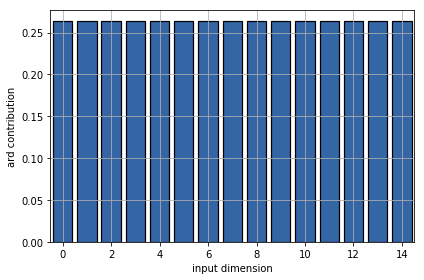

In [429]:
length = np.average(samples['BayesianGPLVM/kern/lengthscales'], axis=0)
var =  np.average(samples['BayesianGPLVM/kern/variance'], axis=0)
Co2 = GPy.kern.RBF(ARD=True,input_dim=15,lengthscale=length,variance=var)
Co2.plot_ARD()
plt.grid()

# PCA

In [303]:
from sklearn.decomposition import PCA

In [364]:
pca_dims = PCA()
pca_dims.fit(X_flat)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

Text(0.5,1,'PCA Explained Variance Ratio')

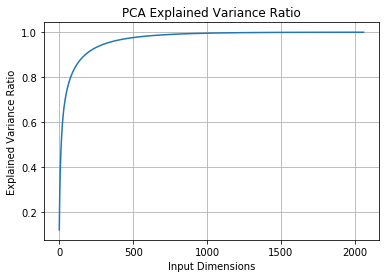

In [365]:
plt.figure()
plt.plot(list(range(len(pca_dims.explained_variance_ratio_))),cumsum)
plt.grid()
plt.xlabel('Input Dimensions')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')

In [366]:
print(d)
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_flat)
X_recovered = pca.inverse_transform(X_reduced)

316


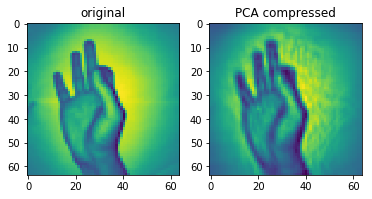

In [368]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("original")
plt.imshow(X_flat[0].reshape((64,64)))
f.add_subplot(1,2, 2)

plt.title("PCA compressed")
plt.imshow(X_recovered[0].reshape((64,64)))
plt.show(block=True)

In [370]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_reduced, Y, test_size=0.3, random_state=42)\

In [371]:
clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100, 100, 100, 100), random_state=1)
clf_reduced.fit(X_train5, y_train5)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [372]:
y_hat_reduced = clf_reduced.predict(X_test5)
print("accuracy: " + str(accuracy_score(y_test5, y_hat_reduced)))

accuracy: 0.6526655896607432


In [373]:
temp_test=[]
unique_rows = np.unique(y_test5, axis=0)
i=0
d={}
for i in range(len(unique_rows)):
    d[str(unique_rows[i])]=i
for i in y_test5:
    temp_test.append(d[str(i)])

In [374]:
unique_rows = np.unique(y_train5, axis=0)
i=0
d={}
for i in range(len(unique_rows)):
    d[str(unique_rows[i])]=i
temp_train=[]
for i in y_train5:
    temp_train.append(d[str(i)])

In [375]:
classifiers[0].fit(X_train5, y_train5)
score = classifiers[0].score(X_test5, y_test5)
print(names[0]+':'+str(score))

Nearest Neighbors:0.6090468497576736


In [376]:
classifiers[1].fit(X_train5, np.array(temp_train))
score = classifiers[1].score(X_test5, np.array(temp_test))
print(names[1]+':'+str(score))

Gaussian Process:0.0888529886914378


In [377]:
classifiers[2].fit(X_train5, np.array(temp_train))
score = classifiers[2].score(X_test5, np.array(temp_test))
print(names[2]+':'+str(score))

Decision Tree:0.3683360258481422


In [378]:
classifiers[3].fit(X_train5, np.array(temp_train))
score = classifiers[3].score(X_test5, np.array(temp_test))
print(names[3]+':'+str(score))

Random Forest:0.15024232633279483


In [379]:
classifiers[4].fit(X_train5, np.array(temp_train))
score = classifiers[4].score(X_test5, np.array(temp_test))
print(names[4]+':'+str(score))

AdaBoost:0.38126009693053314


In [380]:
classifiers[5].fit(X_train5, np.array(temp_train))
score = classifiers[5].score(X_test5, np.array(temp_test))
print(names[5]+':'+str(score))

Naive Bayes:0.5638126009693053


In [381]:
classifiers[6].fit(X_train5, np.array(temp_train))
score = classifiers[6].score(X_test5, np.array(temp_test))
print(names[6]+':'+str(score))

QDA:0.2455573505654281


 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.l

In [382]:
classifiers[7].fit(X_train5, np.array(temp_train))
score = classifiers[7].score(X_test5, np.array(temp_test))
print(names[7]+':'+str(score))

Linear SVC:0.778675282714055


In [383]:
clf3.fit(X_train5,np.array(temp_train))
y_hat_reduced = clf3.predict(X_test5)
print("accuracy: " + str(accuracy_score(np.array(temp_test), y_hat_reduced)))

accuracy: 0.864297253634895


# GPLVM

In [384]:
m2 = GPy.models.BayesianGPLVM(X_flat, 15,  init="PCA",num_inducing=20)
m2.data_labels = X_flat.argmax(axis=1)
loss = m2.optimize('bfgs', messages=1,max_iters=5000)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    07s44  0005   8.474178e+06   6.924966e+10 
    19s23  0013   7.932683e+06   1.858591e+08 
    55s96  0038   7.701423e+06   1.453074e+09 
 02m35s66  0106   7.594573e+06   1.650537e+08 
 04m26s99  0181   5.895241e+07           nan  

 /home/aneeqr/.local/lib/python3.6/site-packages/GPy/kern/src/stationary.py:243: RuntimeWarning:invalid value encountered in true_divide
 /home/aneeqr/.local/lib/python3.6/site-packages/GPy/kern/src/psi_comp/rbf_psi_comp.py:131: RuntimeWarning:invalid value encountered in true_divide
 /home/aneeqr/.local/lib/python3.6/site-packages/paramz/optimization/verbose_optimization.py:160: RuntimeWarning:invalid value encountered in less


 04m29s91  0183   7.567850e+06   1.751085e+08 
Runtime:  04m29s91
Optimization status: Converged



In [385]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(m2.X.mean, Y, test_size=0.3, random_state=42)

 /home/aneeqr/.local/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning:The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0


 /home/aneeqr/.local/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


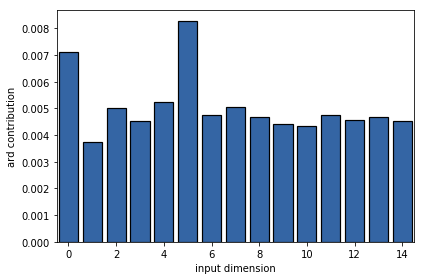

In [386]:
m2.kern.plot_ARD()

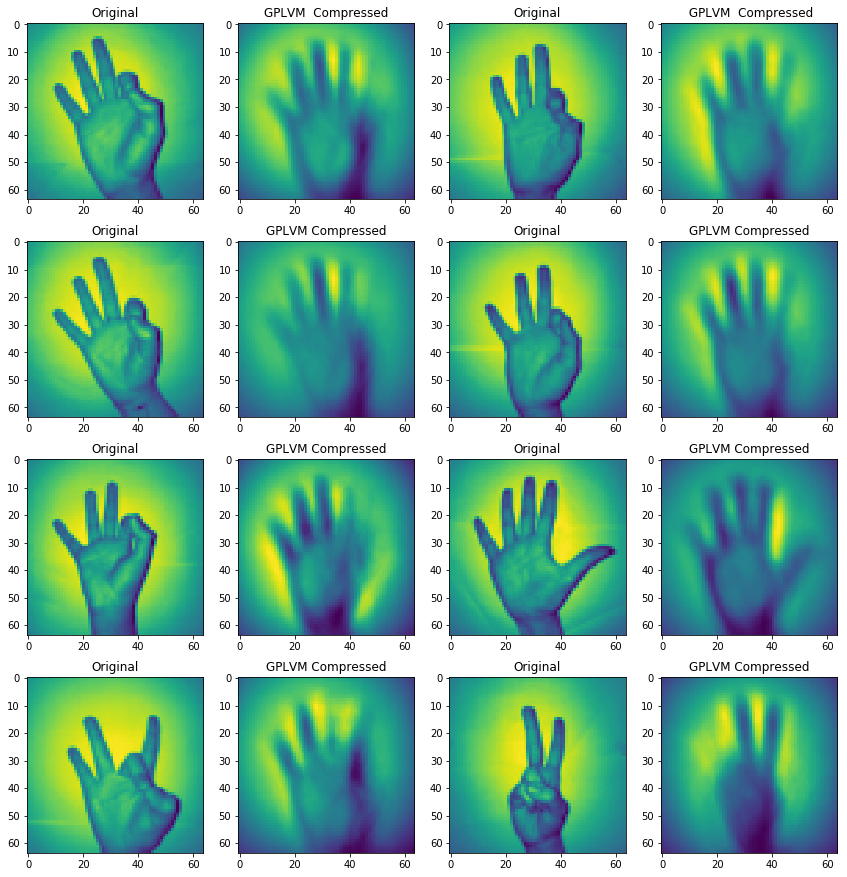

In [389]:
X_back2,X_var2 = m2.predict(m2.X)
f = plt.figure()
f.add_subplot(4,4, 1)
plt.title("Original")
plt.imshow(X_flat[10].reshape((64,64)))
f.add_subplot(4,4, 2)
plt.title("GPLVM  Compressed")
plt.imshow(X_back2[10].reshape((64,64)))
f.add_subplot(4,4, 3)
plt.title("Original")
plt.imshow(X_flat[1].reshape((64,64)))
f.add_subplot(4,4, 4)
plt.title(" GPLVM  Compressed")
plt.imshow(X_back2[1].reshape((64,64)))
f.add_subplot(4,4, 5)
plt.title("Original")
plt.imshow(X_flat[2].reshape((64,64)))
f.add_subplot(4,4, 6)
plt.title("GPLVM Compressed")
plt.imshow(X_back2[2].reshape((64,64)))
plt.subplots_adjust(bottom=0.1, right=2, top=3)
f.add_subplot(4,4, 7)
plt.title("Original")
plt.imshow(X_flat[3].reshape((64,64)))
f.add_subplot(4,4, 8)
plt.title("GPLVM Compressed")
plt.imshow(X_back2[3].reshape((64,64)))
plt.subplots_adjust(bottom=0.1, right=2, top=3)
f.add_subplot(4,4, 9)
plt.title("Original")
plt.imshow(X_flat[42].reshape((64,64)))
f.add_subplot(4,4, 10)
plt.title("GPLVM Compressed")
plt.imshow(X_back[42].reshape((64,64)))
f.add_subplot(4,4, 11)
plt.title("Original")
plt.imshow(X_flat[2005].reshape((64,64)))
f.add_subplot(4,4, 12)
plt.title("GPLVM Compressed")
plt.imshow(X_back2[2005].reshape((64,64)))

f.add_subplot(4,4, 13)
plt.title("Original")
plt.imshow(X_flat[1115].reshape((64,64)))
f.add_subplot(4,4, 14)
plt.title("GPLVM Compressed")
plt.imshow(X_back2[1115].reshape((64,64)))

f.add_subplot(4,4, 15)
plt.title("Original")
plt.imshow(X_flat[1825].reshape((64,64)))
f.add_subplot(4,4, 16)
plt.title("GPLVM Compressed")
plt.imshow(X_back2[1825].reshape((64,64)))
plt.subplots_adjust(bottom=0.1, right=2, top=3)

In [ ]:
temp_test=[]
unique_rows = np.unique(y_test6, axis=0)
i=0
d={}
for i in range(len(unique_rows)):
    d[str(unique_rows[i])]=i
for i in y_test6:
    temp_test.append(d[str(i)])

In [401]:
unique_rows = np.unique(y_train6, axis=0)
i=0
d={}
for i in range(len(unique_rows)):
    d[str(unique_rows[i])]=i
temp_train=[]
for i in y_train6:
    temp_train.append(d[str(i)])

In [406]:
for i in range(8):
    print(names[i])
    classifiers[i].fit(X_train6, np.array(temp_train))
    score = classifiers[i].score(X_test6, np.array(temp_test))
    print(names[i]+':'+str(score))

Nearest Neighbors
Nearest Neighbors:0.6106623586429726
Gaussian Process
Gaussian Process:0.6995153473344103
Decision Tree
Decision Tree:0.3166397415185784
Random Forest
Random Forest:0.4765751211631664
AdaBoost
AdaBoost:0.4168012924071082
Naive Bayes
Naive Bayes:0.6122778675282714
QDA
QDA:0.7366720516962844
Linear SVC
Linear SVC:0.6607431340872375


In [407]:
clf3.fit(X_train6,np.array(temp_train))
y_hat_reduced = clf3.predict(X_test6)
print("accuracy: " + str(accuracy_score(np.array(temp_test), y_hat_reduced)))

accuracy: 0.7140549273021002


In [408]:
clf.fit(X_train6,y_train6)
y_hat_reduced = clf.predict(X_test6)
print("accuracy: " + str(accuracy_score(y_test6, y_hat_reduced)))

accuracy: 0.6558966074313409


# Plot to Use 

In [ ]:
X_back2,X_var2 = m2.predict(m2.X)
f = plt.figure()
f.add_subplot(5,4, 1)
plt.title("Original")
plt.imshow(X_flat[10].reshape((64,64)))
#f.add_subplot(5,4, 2)
#plt.title("GPLVM  Compressed (MAP)")
#plt.imshow(X_back2[10].reshape((64,64)))
f.add_subplot(5,4, 3)
plt.title("B-GPLVM + SVI + VFE")
plt.imshow(X_test_back[10].reshape((64,64)))
f.add_subplot(5,4, 4)
plt.title("B-GPLVM + DTC")
plt.imshow(X_back[10].reshape((64,64)))

f.add_subplot(5,4, 5)
plt.title("Original")
plt.imshow(X_flat[460].reshape((64,64)))
#f.add_subplot(5,4, 6)
#plt.title("GPLVM Compressed (MAP)")
#plt.imshow(X_back2[460].reshape((64,64)))
#plt.subplots_adjust(bottom=0.1, right=2, top=3)
f.add_subplot(5,4, 7)
plt.title("B-GPLVM + SVI + VFE")
plt.imshow(X_test_back[460].reshape((64,64)))
f.add_subplot(5,4, 8)
plt.title("B-GPLVM + DTC")
plt.imshow(X_back[460].reshape((64,64)))
plt.subplots_adjust(bottom=0.1, right=2, top=3)


f.add_subplot(5,4, 9)
plt.title("Original")
plt.imshow(X_flat[1460].reshape((64,64)))
#f.add_subplot(5,4, 10)
#plt.title("GPLVM Compressed (MAP)")
#plt.imshow(X_back2[1460].reshape((64,64)))
#plt.subplots_adjust(bottom=0.1, right=2, top=3)
f.add_subplot(5,4, 11)
plt.title("B-GPLVM + SVI + VFE")
plt.imshow(X_test_back[460].reshape((64,64)))
f.add_subplot(5,4, 12)
plt.title("B-GPLVM + DTC")
plt.imshow(X_back[1460].reshape((64,64)))
plt.subplots_adjust(bottom=0.1, right=2, top=3)


f.add_subplot(5,4, 13)
plt.title("Original")
plt.imshow(X_flat[1115].reshape((64,64)))
#f.add_subplot(5,4, 14)
#plt.title("GPLVM Compressed (MAP)")
#plt.imshow(X_back2[1115].reshape((64,64)))
#plt.subplots_adjust(bottom=0.1, right=2, top=3)
f.add_subplot(5,4, 15)
plt.title("B-GPLVM + SVI + VFE")
plt.imshow(X_test_back[1115].reshape((64,64)))
f.add_subplot(5,4, 16)
plt.title("B-GPLVM + DTC")
plt.imshow(X_back[1115].reshape((64,64)))
plt.subplots_adjust(bottom=0.1, right=2, top=3)


f.add_subplot(5,4, 17)
plt.title("Original")
plt.imshow(X_flat[2009].reshape((64,64)))
#f.add_subplot(5,4, 18)
#plt.title("GPLVM Compressed (MAP)")
#plt.imshow(X_back2[2009].reshape((64,64)))
#plt.subplots_adjust(bottom=0.1, right=2, top=3)
f.add_subplot(5,4, 19)
plt.title("B-GPLVM + SVI + VFE")
plt.imshow(X_test_back[2009].reshape((64,64)))
f.add_subplot(5,4, 20)
plt.title("B-GPLVM + DTC")
plt.imshow(X_back[2009].reshape((64,64)))
plt.subplots_adjust(bottom=0.1, right=2, top=3)



plt.subplots_adjust(bottom=0.1, right=2, top=4)

# Without any DR

In [422]:
X = np.load('datasets/X.npy')
X_flat = np.array(X).reshape((2062, 64*64))
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_flat, Y, test_size=0.3, random_state=42)


In [411]:
temp_test=[]
unique_rows = np.unique(y_test7, axis=0)
i=0
d={}
for i in range(len(unique_rows)):
    d[str(unique_rows[i])]=i
for i in y_test7:
    temp_test.append(d[str(i)])

In [412]:
unique_rows = np.unique(y_train7, axis=0)
i=0
d={}
for i in range(len(unique_rows)):
    d[str(unique_rows[i])]=i
temp_train=[]
for i in y_train7:
    temp_train.append(d[str(i)])

In [413]:
for i in range(8):
    classifiers[i].fit(X_train7, np.array(temp_train))
    score = classifiers[i].score(X_test7, np.array(temp_test))
    print(names[i]+':'+str(score))

Nearest Neighbors:0.6655896607431341
Gaussian Process:0.0888529886914378
Decision Tree:0.4862681744749596
Random Forest:0.37479806138933763
AdaBoost:0.308562197092084
Naive Bayes:0.5896607431340872


 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:Variables are collinear
 /home/aneeqr/.l

QDA:0.19547657512116318
Linear SVC:0.7915993537964459


In [414]:
clf3.fit(X_train7,np.array(temp_train))
y_hat_reduced = clf3.predict(X_test7)
print("accuracy: " + str(accuracy_score(np.array(temp_test), y_hat_reduced)))

accuracy: 0.8659127625201939


In [425]:
clf4 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100, 100, 100, 100), random_state=1)
clf4.fit(X_train7, y_train7)
y_hat_reduced = clf4.predict(X_test7)
print("accuracy: " + str(accuracy_score(y_test7, y_hat_reduced)))

accuracy: 0.46849757673667203


# Other DR Methods

In [ ]:
from sklearn import manifold

In [3]:
def psisloo(log_lik, **kwargs):
    r"""PSIS leave-one-out log predictive densities.

    Computes the log predictive densities given posterior samples of the log
    likelihood terms :math:`p(y_i|\theta^s)` in input parameter `log_lik`.
    Returns a sum of the leave-one-out log predictive densities `loo`,
    individual leave-one-out log predictive density terms `loos` and an estimate
    of Pareto tail indeces `ks`. The estimates are unreliable if tail index
    ``k > 0.7`` (see more in the references listed in the module docstring).

    Additional keyword arguments are passed to the :meth:`psislw()` function
    (see the corresponding documentation).

    Parameters
    ----------
    log_lik : ndarray
        Array of size n x m containing n posterior samples of the log likelihood
        terms :math:`p(y_i|\theta^s)`.

    Returns
    -------
    loo : scalar
        sum of the leave-one-out log predictive densities

    loos : ndarray
        individual leave-one-out log predictive density terms

    ks : ndarray
        estimated Pareto tail indeces

    """
    # ensure overwrite flag in passed arguments
    kwargs['overwrite_lw'] = True
    # log raw weights from log_lik
    lw = -log_lik
    # compute Pareto smoothed log weights given raw log weights
    lw, ks = psislw(lw, **kwargs)
    # compute
    lw += log_lik
    loos = sumlogs(lw, axis=0)
    loo = loos.sum()
    #print('Ks'+str(ks))
    return loo, loos, ks

def psislw(lw, Reff=1.0, overwrite_lw=False):
    """Pareto smoothed importance sampling (PSIS).

    Parameters
    ----------
    lw : ndarray
        Array of size n x m containing m sets of n log weights. It is also
        possible to provide one dimensional array of length n.

    Reff : scalar, optional
        relative MCMC efficiency ``N_eff / N``

    overwrite_lw : bool, optional
        If True, the input array `lw` is smoothed in-place, assuming the array
        is F-contiguous. By default, a new array is allocated.

    Returns
    -------
    lw_out : ndarray
        smoothed log weights
    kss : ndarray
        Pareto tail indices

    """
    if lw.ndim == 2:
        n, m = lw.shape
    elif lw.ndim == 1:
        n = len(lw)
        m = 1
    else:
        raise ValueError("Argument `lw` must be 1 or 2 dimensional.")
    if n <= 1:
        raise ValueError("More than one log-weight needed.")

    if overwrite_lw and lw.flags.f_contiguous:
        # in-place operation
        lw_out = lw
    else:
        # allocate new array for output
        lw_out = np.copy(lw, order='F')

    # allocate output array for kss
    kss = np.empty(m)
    #print(kss)

    # precalculate constants
    cutoff_ind = - int(np.ceil(min(0.2 * n, 3 * np.sqrt(n / Reff)))) - 1
    cutoffmin = np.log(np.finfo(float).tiny)
    logn = np.log(n)
    k_min = 1/3

    # loop over sets of log weights
    for i, x in enumerate(lw_out.T if lw_out.ndim == 2 else lw_out[None, :]):
        # improve numerical accuracy
        x -= np.max(x)
        # sort the array
        x_sort_ind = np.argsort(x)
        # divide log weights into body and right tail
        xcutoff = max(
            x[x_sort_ind[cutoff_ind]],
            cutoffmin
        )
        expxcutoff = np.exp(xcutoff)
        tailinds, = np.where(x > xcutoff)
        x2 = x[tailinds]
        n2 = len(x2)
        if n2 <= 4:
            # not enough tail samples for gpdfitnew
            k = np.inf
        else:
            # order of tail samples
            x2si = np.argsort(x2)
            # fit generalized Pareto distribution to the right tail samples
            np.exp(x2, out=x2)
            x2 -= expxcutoff
            k, sigma = gpdfitnew(x2, sort=x2si)
        if k >= k_min and not np.isinf(k):
            # no smoothing if short tail or GPD fit failed
            # compute ordered statistic for the fit
            sti = np.arange(0.5, n2)
            sti /= n2
            qq = gpinv(sti, k, sigma)
            qq += expxcutoff
            np.log(qq, out=qq)
            # place the smoothed tail into the output array
            x[tailinds[x2si]] = qq
            # truncate smoothed values to the largest raw weight 0
            x[x > 0] = 0
        # renormalize weights
        x -= sumlogs(x)
        # store tail index k
        kss[i] = k
        #print(k)

    # If the provided input array is one dimensional, return kss as scalar.
    if lw_out.ndim == 1:
        kss = kss[0]

    return lw_out, kss

def sumlogs(x, axis=None, out=None):
    """Sum of vector where numbers are represented by their logarithms.

    Calculates ``np.log(np.sum(np.exp(x), axis=axis))`` in such a fashion that
    it works even when elements have large magnitude.

    """
    maxx = x.max(axis=axis, keepdims=True)
    xnorm = x - maxx
    np.exp(xnorm, out=xnorm)
    out = np.sum(xnorm, axis=axis, out=out)
    if isinstance(out, np.ndarray):
        np.log(out, out=out)
    else:
        out = np.log(out)
    out += np.squeeze(maxx)
    return out
def gpdfitnew(x, sort=True, sort_in_place=False, return_quadrature=False):
    """Estimate the paramaters for the Generalized Pareto Distribution (GPD)

    Returns empirical Bayes estimate for the parameters of the two-parameter
    generalized Parato distribution given the data.

    Parameters
    ----------
    x : ndarray
        One dimensional data array

    sort : bool or ndarray, optional
        If known in advance, one can provide an array of indices that would
        sort the input array `x`. If the input array is already sorted, provide
        False. If True (default behaviour), the array is sorted internally.

    sort_in_place : bool, optional
        If `sort` is True and `sort_in_place` is True, the array is sorted
        in-place (False by default).

    return_quadrature : bool, optional
        If True, quadrature points and weight `ks` and `w` of the marginal posterior distribution of k are also calculated and returned. False by
        default.

    Returns
    -------
    k, sigma : float
        estimated parameter values

    ks, w : ndarray
        Quadrature points and weights of the marginal posterior distribution
        of `k`. Returned only if `return_quadrature` is True.

    Notes
    -----
    This function returns a negative of Zhang and Stephens's k, because it is
    more common parameterisation.

    """
    if x.ndim != 1 or len(x) <= 1:
        raise ValueError("Invalid input array.")

    # check if x should be sorted
    if sort is True:
        if sort_in_place:
            x.sort()
            xsorted = True
        else:
            sort = np.argsort(x)
            xsorted = False
    elif sort is False:
        xsorted = True
    else:
        xsorted = False

    n = len(x)
    PRIOR = 3
    m = 30 + int(np.sqrt(n))

    bs = np.arange(1, m + 1, dtype=float)
    bs -= 0.5
    np.divide(m, bs, out=bs)
    np.sqrt(bs, out=bs)
    np.subtract(1, bs, out=bs)
    if xsorted:
        bs /= PRIOR * x[int(n/4 + 0.5) - 1]
        bs += 1 / x[-1]
    else:
        bs /= PRIOR * x[sort[int(n/4 + 0.5) - 1]]
        bs += 1 / x[sort[-1]]

    ks = np.negative(bs)
    temp = ks[:,None] * x
    np.log1p(temp, out=temp)
    np.mean(temp, axis=1, out=ks)

    L = bs / ks
    np.negative(L, out=L)
    np.log(L, out=L)
    L -= ks
    L -= 1
    L *= n

    temp = L - L[:,None]
    np.exp(temp, out=temp)
    w = np.sum(temp, axis=1)
    np.divide(1, w, out=w)

    # remove negligible weights
    dii = w >= 10 * np.finfo(float).eps
    if not np.all(dii):
        w = w[dii]
        bs = bs[dii]
    # normalise w
    w /= w.sum()

    # posterior mean for b
    b = np.sum(bs * w)
    # Estimate for k, note that we return a negative of Zhang and
    # Stephens's k, because it is more common parameterisation.
    temp = (-b) * x
    np.log1p(temp, out=temp)
    k = np.mean(temp)
    if return_quadrature:
        np.negative(x, out=temp)
        temp = bs[:, None] * temp
        np.log1p(temp, out=temp)
        ks = np.mean(temp, axis=1)
    # estimate for sigma
    sigma = -k / b * n / (n - 0)
    # weakly informative prior for k
    a = 10
    k = k * n / (n+a) + a * 0.5 / (n+a)
    if return_quadrature:
        ks *= n / (n+a)
        ks += a * 0.5 / (n+a)

    if return_quadrature:
        #print('K:'+str(k))
        return k, sigma, ks, w
    else:
        #print('K:'+str(k))
        return k, sigma

def gpinv(p, k, sigma):
    """Inverse Generalised Pareto distribution function."""
    x = np.empty(p.shape)
    x.fill(np.nan)
    if sigma <= 0:
        return x
    ok = (p > 0) & (p < 1)
    if np.all(ok):
        if np.abs(k) < np.finfo(float).eps:
            np.negative(p, out=x)
            np.log1p(x, out=x)
            np.negative(x, out=x)
        else:
            np.negative(p, out=x)
            np.log1p(x, out=x)
            x *= -k
            np.expm1(x, out=x)
            x /= k
        x *= sigma
    else:
        if np.abs(k) < np.finfo(float).eps:
            # x[ok] = - np.log1p(-p[ok])
            temp = p[ok]
            np.negative(temp, out=temp)
            np.log1p(temp, out=temp)
            np.negative(temp, out=temp)
            x[ok] = temp
        else:
            # x[ok] = np.expm1(-k * np.log1p(-p[ok])) / k
            temp = p[ok]
            np.negative(temp, out=temp)
            np.log1p(temp, out=temp)
            temp *= -k
            np.expm1(temp, out=temp)
            temp /= k
            x[ok] = temp
        x *= sigma
        x[p == 0] = 0
        if k >= 0:
            x[p == 1] = np.inf
        else:
            x[p == 1] = -sigma / k
    return x

In [2]:
def log_Ratios(qx,Join):
    Rs = [] # Rations with exp
    Rs2 = [] # Rations without exp just log ratios
    for i in range(len(qx)):
        Rs.append(np.exp(Join[i]-qx[i]))
        Rs2.append(-1*(Join[i]-qx[i]))
    return Rs,Rs2